C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


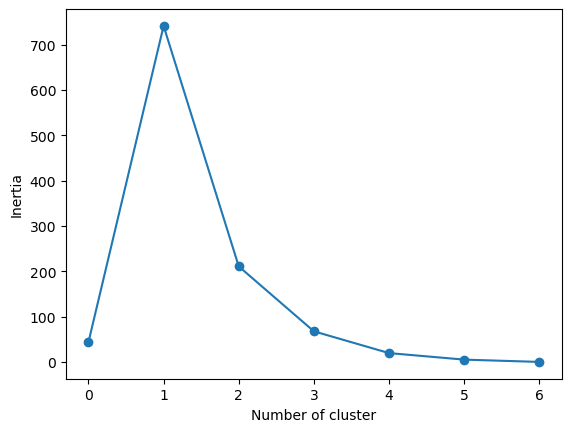

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import NearestCentroid
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch



df = pd.read_csv("./WineQT.csv")
df = df.replace('?', np.nan)
df = df.dropna()
df.drop("Id", axis=1, inplace=True)
#df.drop("free sulfur dioxide", axis=1, inplace=True)
#df.drop("fixed acidity", axis=1, inplace=True)

#df.quality = df.quality.map(int)

from sklearn.cluster import KMeans
inertia=np.empty(7)
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df['quality'].values.reshape(-1,1))
    inertia[i] = kmeans.inertia_

plt.plot(range(0,7),inertia,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

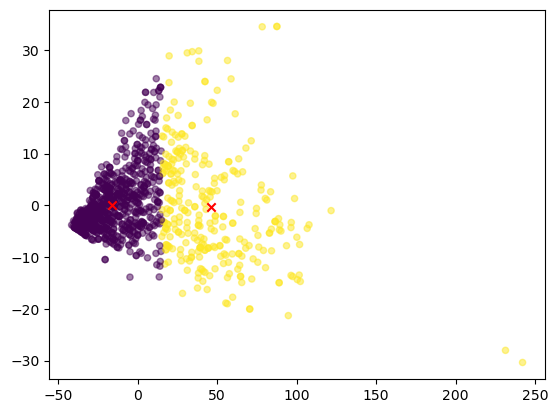

Silhouette score: 0.60490


In [7]:
# Load the data
X = pd.read_csv("./WineQT.csv")
X.drop("Id", axis=1, inplace=True)
X.drop("quality", axis=1, inplace=True)

# Reduce the number of features using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a KMeans model with 2 clusters
model = KMeans(n_clusters=2, init='k-means++')

# Fit the model to the data
model.fit(X_pca)

# Predict the clusters for each data point
clusters = model.predict(X_pca)

# Get the centers of the clusters
centers = model.cluster_centers_

# Plot the reduced features
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s= 20, alpha=0.5)  # plot different colors per cluster
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red')

plt.show()

# Calculate the silhouette score
silhouette_score = silhouette_samples(X_pca, clusters)
print(f"Silhouette score: {(sum(silhouette_score)/len(silhouette_score)):.5f}")

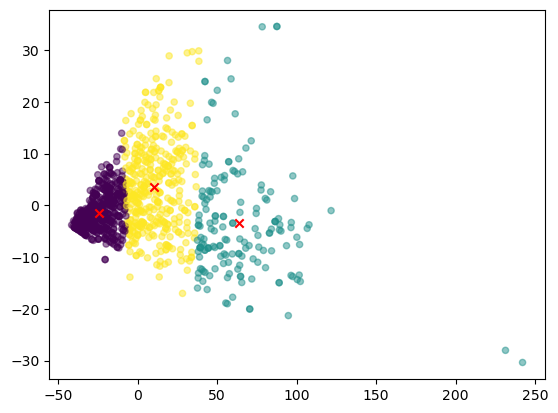

Silhouette score: 0.53178


In [8]:
# Load the data
X = pd.read_csv("./WineQT.csv")
X.drop("Id", axis=1, inplace=True)
X.drop("quality", axis=1, inplace=True)

# Reduce the number of features using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a KMeans model with 2 clusters
model = KMeans(n_clusters=3, init='k-means++')

# Fit the model to the data
model.fit(X_pca)

# Predict the clusters for each data point
clusters = model.predict(X_pca)

# Get the centers of the clusters
centers = model.cluster_centers_

# Plot the reduced features
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s= 20, alpha=0.5)  # plot different colors per cluster
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red')

plt.show()


# Calculate the silhouette score
silhouette_score = silhouette_samples(X_pca, clusters)
print(f"Silhouette score: {(sum(silhouette_score)/len(silhouette_score)):.5f}")

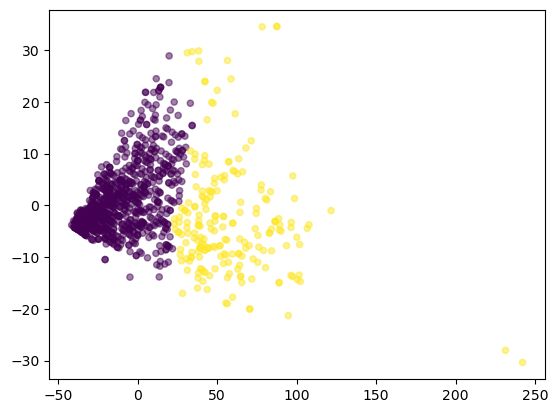

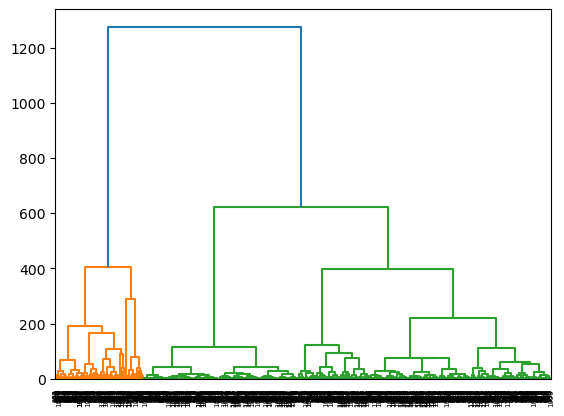

Silhouette score: 0.61882


In [10]:
# Load the data
X = pd.read_csv("./WineQT.csv")
X.drop("Id", axis=1, inplace=True)
X.drop("quality", axis=1, inplace=True)

# Reduce the number of features using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create an AgglomerativeClustering model with 2 clusters
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the model to the data
model.fit(X_pca)

# Predict the clusters for each data point
clusters = model.fit_predict(X_pca)


# Plot the reduced features
plt.scatter(X_pca[:, 0], X_pca[:, 1], s= 20, c=clusters, alpha=0.5)
plt.show()


linkage_data = linkage(X_pca, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

# Calculate the silhouette score
silhouette_score = silhouette_samples(X_pca, clusters)
print(f"Silhouette score: {(sum(silhouette_score)/len(silhouette_score)):.5f}")